In [1]:
import pandas as pd
import numpy as np 

from utils import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,15]

E:\Projects\bitbucket\fancy-a-challenge-william\utils.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  combined_df = pd.concat([csv_df,txt_df])



df shape:  (3000, 9)

rows with null values:      author.properties.friends  author.properties.status_count  \
551                       854                          3688.0   
552  || TELL ME YOUR NAME! XD                             NaN   

    author.properties.verified                  content.body location.country  \
551                      False  @DrunkenOldQrow @FancyWeiss                GB   
552                    twitter                           NaN              NaN   

     location.latitude  location.longitude properties.platform  \
551          52.052777           -2.702861                 NaN   
552                NaN                 NaN                 NaN   

     properties.sentiment  
551                   1.0  
552                   NaN  

types of platforms:  twitter    2996
Name: properties.platform, dtype: int64

rows that arent twitter:  (1, 9)

type of friends col:  int32

 country breakdown:  GB    2989
GG       5
JE       2
IM       1
Name: location.country,

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,location.latitude,location.longitude,properties.sentiment
0,1689,22566.0,False,Can't believe I'm missing Love Island 😩,GB,51.570448,0.457135,1.0
1,114,1377.0,False,Last tweet about future wedding..... if I actu...,GB,52.969744,-1.172266,1.0
2,568,8375.0,False,"How many times does he wonna say the phrase ""i...",GB,51.394369,0.026299,-1.0
3,1845,19394.0,False,...even better if time travel were invented an...,GB,51.648544,-3.804292,-1.0
4,1617,17922.0,False,@GreenAlty @ShakeyStephens My Mum in mid 80s p...,GB,53.543471,-2.653238,0.0


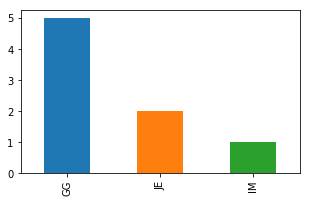

In [2]:
combined_df = load_combined_df()
combined_df.head()

In [8]:
#encode country and verified cols
combined_df['location.country'].unique()
combined_df = encode_labels(combined_df,['author.properties.verified','location.country'])
combined_df['location.country'].unique()


array(['GB', 'GG', 'IM', 'JE'], dtype=object)

author.properties.verified
location.country


array([0, 1, 2, 3], dtype=int64)

In [9]:
no_body_df = normalize(combined_df.drop(['content.body','location.country','location.latitude','location.longitude'],axis=1))

print('\nRunning PCA again ...')
label_col = "properties.sentiment"
y_normal = no_body_df[label_col].values.astype(np.int8)

colors = ['blue', 'red']
n_comp = len(no_body_df.drop([label_col],axis=1).columns)
target_names = np.unique(y_normal)
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(no_body_df.drop([label_col],axis=1).values)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

X_pca


Running PCA again ...
Explained variance: 1.0000


array([[-0.00777076, -0.00726735,  0.00125783],
       [-0.00793499, -0.01980739, -0.00321344],
       [-0.00788078, -0.01566995, -0.00193538],
       ...,
       [-0.00766915,  0.00043001, -0.00130692],
       [-0.00772137, -0.00355792, -0.0027983 ],
       [-0.00794388, -0.02044954, -0.00028688]])

Individual variance contributions:
0.544437179424992
0.41187485383382955
0.04368796674117838


Text(0.5,1,'Scatter plot of the training data projected on the 1st and 2nd principal components')

Text(0.5,0,'Principal axis 1 - Explains 54.4 % of the variance')

Text(0,0.5,'Principal axis 2 - Explains 41.2 % of the variance')

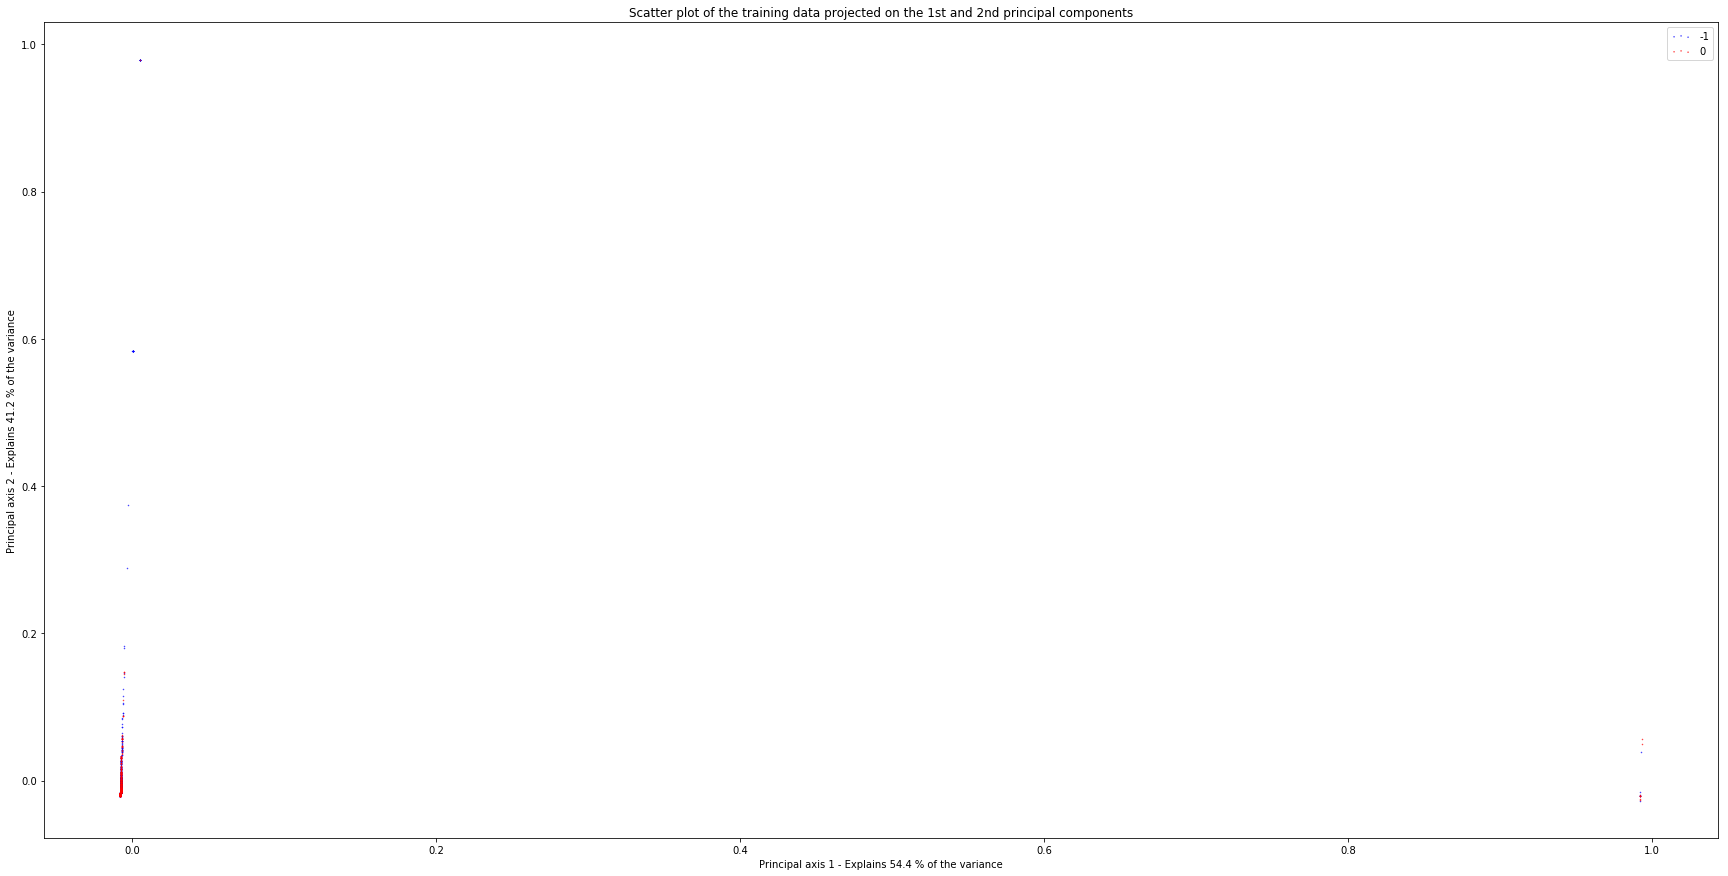

In [15]:
print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

colors = ['blue', 'red']
plt.rcParams['figure.figsize'] = [30,15]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y_normal == i, 0], X_pca[y_normal == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()


Running PCA again ...


Text(0.5,1,'Scatter plot of the training data projected on the 1st and 2nd principal components')

Text(0.5,0,'latitude')

Text(0,0.5,'longitude')

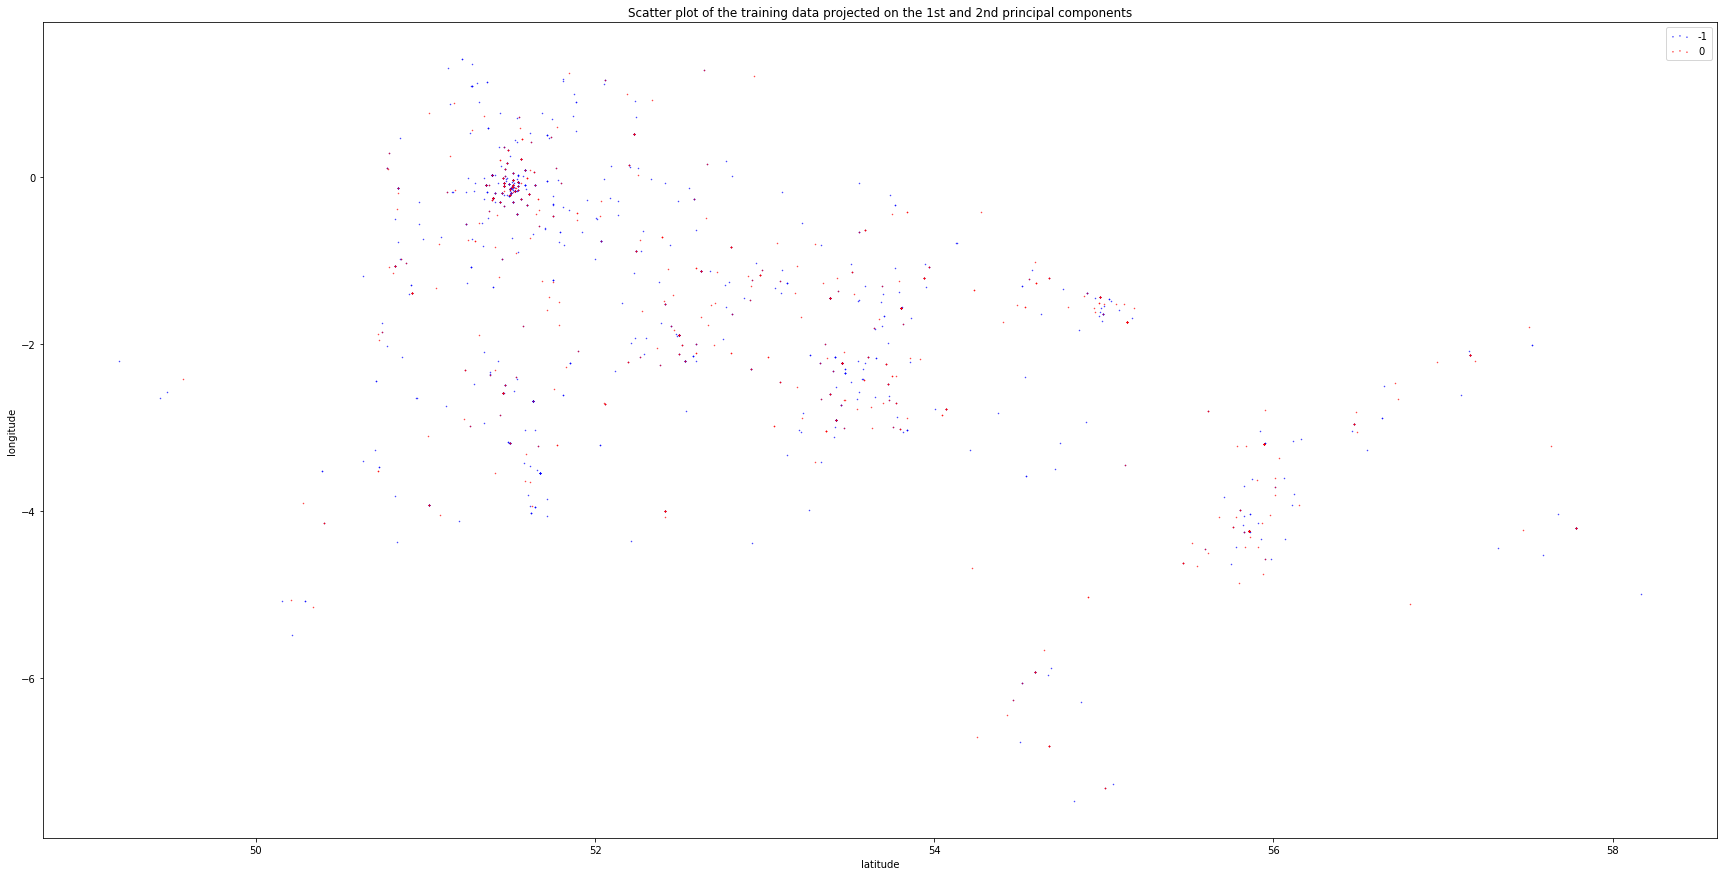

In [12]:
geo_array = np.array(combined_df[['location.latitude','location.longitude']])

print('\nRunning PCA again ...')
label_col = "properties.sentiment"
y_normal = combined_df[label_col].values.astype(np.int8)
target_names = np.unique(y_normal)

colors = ['blue', 'red']
plt.rcParams['figure.figsize'] = [30,15]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(geo_array[y_normal == i, 0], geo_array[y_normal == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("latitude")
plt.ylabel("longitude")

#plt.savefig('pca-porto-01.png', dpi=150)
plt.show()